# China Cheng Xin Capstone Project

Contributer: Dawei Zhang, Jiahe Hou, Yuan Xin

<h2>Data Visualization</h2>

In [18]:
# packages
import pandas as pd
import numpy as np
import re
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [223]:
behavior = pd.read_csv('Behavior_train.csv', encoding='gb2312')
behavior

/Users/jiahehou/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ccx_id,age,gender,MobileProv,MobileCity,idno_prov,idno_city,is_sh,is_mngt,is_gt,...,TRA_Share_Bike_uninstall_2M_3M,TRA_Traffic_Law_all_0M_1M,TRA_Traffic_Law_all_1M_2M,TRA_Traffic_Law_all_2M_3M,TRA_Traffic_Law_installing_0M_1M,TRA_Traffic_Law_installing_1M_2M,TRA_Traffic_Law_installing_2M_3M,TRA_Traffic_Law_uninstall_0M_1M,TRA_Traffic_Law_uninstall_1M_2M,TRA_Traffic_Law_uninstall_2M_3M
0,1,26,男,江苏,徐州市,江苏省,徐州市,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,28,男,上海,上海,福建省,漳州市,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,40,女,广东,湛江市,广东省,湛江市,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8,21,女,浙江,杭州市,陕西省,西安市,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10,33,女,浙江,杭州市,河南省,驻马店市,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,15,27,男,北京,北京,江苏省,镇江市,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,17,37,女,浙江,金华市,浙江省,金华市,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,19,43,女,广东,湛江市,黑龙江省,七台河市,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,25,21,女,上海,上海,四川省,巴中市,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,26,37,女,广西,梧州市,广西壮族自治区,梧州市,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [224]:
list(behavior.columns.values)

['ccx_id',
 'age',
 'gender',
 'MobileProv',
 'MobileCity',
 'idno_prov',
 'idno_city',
 'is_sh',
 'is_mngt',
 'is_gt',
 'result',
 'DEGREE',
 'DEGREE_TYPE',
 'SCHOOL_NAME',
 'SCHOOL_TYPE',
 'MAJOR',
 'ENROLLMENT_DATE',
 'GRADUATION_DATE',
 'GRADUATION_CONTENT',
 'recall_date',
 'ASSETS_Own_Car_all_0M_1M',
 'ASSETS_Own_Car_all_1M_2M',
 'ASSETS_Own_Car_all_2M_3M',
 'ASSETS_Own_Car_installing_0M_1M',
 'ASSETS_Own_Car_installing_1M_2M',
 'ASSETS_Own_Car_installing_2M_3M',
 'ASSETS_Own_Car_uninstall_0M_1M',
 'ASSETS_Own_Car_uninstall_1M_2M',
 'ASSETS_Own_Car_uninstall_2M_3M',
 'ASSETS_Own_House_all_0M_1M',
 'ASSETS_Own_House_all_1M_2M',
 'ASSETS_Own_House_all_2M_3M',
 'ASSETS_Own_House_installing_0M_1M',
 'ASSETS_Own_House_installing_1M_2M',
 'ASSETS_Own_House_installing_2M_3M',
 'ASSETS_Own_House_uninstall_0M_1M',
 'ASSETS_Own_House_uninstall_1M_2M',
 'ASSETS_Own_House_uninstall_2M_3M',
 'ASSETS_Rent_House_all_0M_1M',
 'ASSETS_Rent_House_all_1M_2M',
 'ASSETS_Rent_House_all_2M_3M',
 'ASSET

In [225]:
province = behavior.groupby(['MobileProv']).size().sort_values(ascending=False)
province

MobileProv
广东     3410
浙江     1899
江苏     1694
四川     1165
福建     1123
山东      965
湖北      956
河南      941
广西      742
上海      735
河北      679
湖南      668
北京      645
云南      563
安徽      528
江西      512
辽宁      471
陕西      470
山西      455
重庆      421
贵州      369
黑龙江     305
甘肃      235
吉林      234
内蒙古     222
海南      199
天津      180
宁夏       76
新疆       71
青海       42
西藏        7
dtype: int64

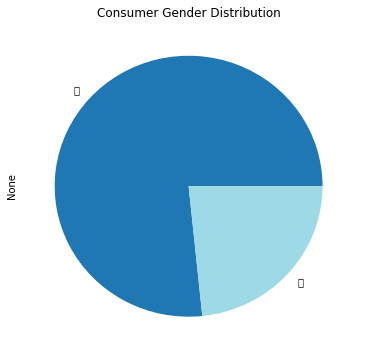

In [226]:
gender = behavior.groupby(['gender'])
ax =gender.size().plot(kind='pie',figsize=(6,6),title = "Consumer Gender Distribution",colormap = 'tab20')
ax
# plt.axis('equal')
# plt.show()

Text(0,0.5,'Count')

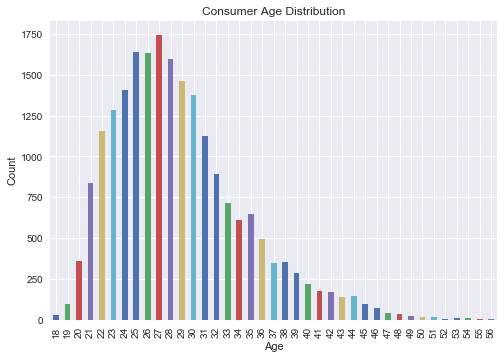

In [227]:
plt.style.use('seaborn')
age = behavior.groupby(['age'])
ax =age.size().plot(kind='bar',title = "Consumer Age Distribution")
ax.set_xlabel("Age")
ax.set_ylabel("Count")

In [228]:
consumer = pd.read_csv('Consumer_train.csv',encoding = 'utf-8')
consumer.head()

,ccx_id,province,city,area,fare,goodsvalue,orderamount,paymenttime,platform,refund,discount,ordertime,deliveryNum,unitPrice,goodsName
0,1,山东,济宁,任城,10.0,38.0,48.0,2015/6/4 9:41,淘宝分销,0.0,0.0,0000-00-00 00:00:00,1.0,38.0,书籍/杂志/报纸
1,1,山东,济宁,任城,10.0,38.0,48.0,2015/6/4 9:41,淘宝分销,0.0,0.0,2015/6/3 23:04,1.0,38.0,书籍/杂志/报纸
2,1,江苏,徐州,新沂,0.0,25.0,25.0,2015/11/28 20:36,淘宝,0.0,0.0,0000-00-00 00:00:00,1.0,25.0,书籍/杂志/报纸
3,1,江苏,徐州,新沂,0.0,49.5,49.5,2014/7/9 10:08,淘宝,0.0,0.0,0000-00-00 00:00:00,1.0,49.5,女士内衣/男士内衣/家居服
4,1,江苏,徐州,新沂,0.0,12.8,12.8,2016/10/14 22:16,淘宝,0.0,27.0,2016/10/14 22:16,1.0,12.8,书籍/杂志/报纸


In [229]:
province2 = consumer.groupby(['province']).size().sort_values(ascending=False)
province2

province
广东     54109
浙江     45113
江苏     39312
上海     31092
福建     21635
山东     18591
四川     17528
湖北     15906
河南     15750
北京     14624
湖南     12641
河北     12616
云南     10976
广西     10842
安徽      9909
江西      9600
辽宁      8682
陕西      8033
重庆      7182
山西      6993
贵州      6581
黑龙江     5419
天津      4930
吉林      4084
内蒙古     3927
甘肃      3546
海南      3249
宁夏      1117
新疆      1109
青海       654
NON      483
西藏       133
香港         1
dtype: int64

<h2>Data Cleaning</h2>

Behavioral dataset:
- combine features
    - leave only the "all" columns (delete "installing" and "uninstall")
    - sum up each "all" category 
    - delete coumns with 1M-2M and 2M-3M
- rename columns to make them easy to read
- combine features that fall into same category


In [230]:
# deleting columns with string "installing" and "uninstall"
def delete_extra(df):
    pattern1 = r'_installing_'
    pattern2 = r'_uninstall_'
    colnames = list(df.columns.values)
    for i in colnames:
        match = re.search(pattern1, i)
        if match:
            df.drop(i, axis=1, inplace=True)
    for i in colnames:
        match = re.search(pattern2, i)
        if match:
            df.drop(i, axis=1, inplace=True)
    return df

In [231]:
new_behavior = delete_extra(behavior)

In [232]:
list(new_behavior.columns.values)

['ccx_id',
 'age',
 'gender',
 'MobileProv',
 'MobileCity',
 'idno_prov',
 'idno_city',
 'is_sh',
 'is_mngt',
 'is_gt',
 'result',
 'DEGREE',
 'DEGREE_TYPE',
 'SCHOOL_NAME',
 'SCHOOL_TYPE',
 'MAJOR',
 'ENROLLMENT_DATE',
 'GRADUATION_DATE',
 'GRADUATION_CONTENT',
 'recall_date',
 'ASSETS_Own_Car_all_0M_1M',
 'ASSETS_Own_Car_all_1M_2M',
 'ASSETS_Own_Car_all_2M_3M',
 'ASSETS_Own_House_all_0M_1M',
 'ASSETS_Own_House_all_1M_2M',
 'ASSETS_Own_House_all_2M_3M',
 'ASSETS_Rent_House_all_0M_1M',
 'ASSETS_Rent_House_all_1M_2M',
 'ASSETS_Rent_House_all_2M_3M',
 'BOOK_Comic_all_0M_1M',
 'BOOK_Comic_all_1M_2M',
 'BOOK_Comic_all_2M_3M',
 'BOOK_Novel_Fantasy_all_0M_1M',
 'BOOK_Novel_Fantasy_all_1M_2M',
 'BOOK_Novel_Fantasy_all_2M_3M',
 'BOOK_Novel_Romance_all_0M_1M',
 'BOOK_Novel_Romance_all_1M_2M',
 'BOOK_Novel_Romance_all_2M_3M',
 'BOOK_Novel_all_0M_1M',
 'BOOK_Novel_all_1M_2M',
 'BOOK_Novel_all_2M_3M',
 'BUS_BusinessCard_all_0M_1M',
 'BUS_BusinessCard_all_1M_2M',
 'BUS_BusinessCard_all_2M_3M',
 'BU

In [233]:
# sum up three peroid to 0m-1m for each category
def add_all(df):
    pattern = r'_all_0M_1M'
    colnames = list(df.columns.values)
    for i in colnames:
        match = re.search(pattern, i)
        if match: 
            index = df.columns.get_loc(i)
            df[i] = df.iloc[:, index:(index+3)].sum(axis=1)
    return df

In [234]:
new_behavior = add_all(new_behavior)
new_behavior

,ccx_id,age,gender,MobileProv,MobileCity,idno_prov,idno_city,is_sh,is_mngt,is_gt,...,TRA_Guide_all_2M_3M,TRA_Map_GPS_all_0M_1M,TRA_Map_GPS_all_1M_2M,TRA_Map_GPS_all_2M_3M,TRA_Share_Bike_all_0M_1M,TRA_Share_Bike_all_1M_2M,TRA_Share_Bike_all_2M_3M,TRA_Traffic_Law_all_0M_1M,TRA_Traffic_Law_all_1M_2M,TRA_Traffic_Law_all_2M_3M
0,1,26,男,江苏,徐州市,江苏省,徐州市,0,0,0,...,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
1,2,28,男,上海,上海,福建省,漳州市,0,0,0,...,1.0,3.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN
2,4,40,女,广东,湛江市,广东省,湛江市,0,0,1,...,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
3,8,21,女,浙江,杭州市,陕西省,西安市,0,0,0,...,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
4,10,33,女,浙江,杭州市,河南省,驻马店市,0,0,0,...,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
5,15,27,男,北京,北京,江苏省,镇江市,0,0,0,...,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
6,17,37,女,浙江,金华市,浙江省,金华市,0,0,0,...,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
7,19,43,女,广东,湛江市,黑龙江省,七台河市,0,0,0,...,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
8,25,21,女,上海,上海,四川省,巴中市,0,0,0,...,1.0,1.0,NaN,1.0,1.0,NaN,1.0,0.0,NaN,NaN
9,26,37,女,广西,梧州市,广西壮族自治区,梧州市,0,0,0,...,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN


In [236]:
# delete all_1M_2M
def delete_all_12(df):
    pattern = r'_all_1M_2M'
    colnames = list(df.columns.values)
    for i in colnames:
        match = re.search(pattern, i)
        if match:
            df.drop(i, axis=1, inplace=True)
    return df

In [238]:
new_behavior = delete_all_12(new_behavior)
list(new_behavior.columns.values)

['ccx_id',
 'age',
 'gender',
 'MobileProv',
 'MobileCity',
 'idno_prov',
 'idno_city',
 'is_sh',
 'is_mngt',
 'is_gt',
 'result',
 'DEGREE',
 'DEGREE_TYPE',
 'SCHOOL_NAME',
 'SCHOOL_TYPE',
 'MAJOR',
 'ENROLLMENT_DATE',
 'GRADUATION_DATE',
 'GRADUATION_CONTENT',
 'recall_date',
 'ASSETS_Own_Car_all_0M_1M',
 'ASSETS_Own_Car_all_2M_3M',
 'ASSETS_Own_House_all_0M_1M',
 'ASSETS_Own_House_all_2M_3M',
 'ASSETS_Rent_House_all_0M_1M',
 'ASSETS_Rent_House_all_2M_3M',
 'BOOK_Comic_all_0M_1M',
 'BOOK_Comic_all_2M_3M',
 'BOOK_Novel_Fantasy_all_0M_1M',
 'BOOK_Novel_Fantasy_all_2M_3M',
 'BOOK_Novel_Romance_all_0M_1M',
 'BOOK_Novel_Romance_all_2M_3M',
 'BOOK_Novel_all_0M_1M',
 'BOOK_Novel_all_2M_3M',
 'BUS_BusinessCard_all_0M_1M',
 'BUS_BusinessCard_all_2M_3M',
 'BUS_Calculator_all_0M_1M',
 'BUS_Calculator_all_2M_3M',
 'BUS_Note_all_0M_1M',
 'BUS_Note_all_2M_3M',
 'BUS_Reader_all_0M_1M',
 'BUS_Reader_all_2M_3M',
 'BUS_Soft_Communication&Meeting_all_0M_1M',
 'BUS_Soft_Communication&Meeting_all_2M_3M',

In [239]:
# delete all_2M_3M
def delete_all_23(df):
    pattern = r'_all_2M_3M'
    colnames = list(df.columns.values)
    for i in colnames:
        match = re.search(pattern, i)
        if match:
            df.drop(i, axis=1, inplace=True)
    return df
new_behavior = delete_all_23(new_behavior)

In [240]:
list(new_behavior.columns.values)

['ccx_id',
 'age',
 'gender',
 'MobileProv',
 'MobileCity',
 'idno_prov',
 'idno_city',
 'is_sh',
 'is_mngt',
 'is_gt',
 'result',
 'DEGREE',
 'DEGREE_TYPE',
 'SCHOOL_NAME',
 'SCHOOL_TYPE',
 'MAJOR',
 'ENROLLMENT_DATE',
 'GRADUATION_DATE',
 'GRADUATION_CONTENT',
 'recall_date',
 'ASSETS_Own_Car_all_0M_1M',
 'ASSETS_Own_House_all_0M_1M',
 'ASSETS_Rent_House_all_0M_1M',
 'BOOK_Comic_all_0M_1M',
 'BOOK_Novel_Fantasy_all_0M_1M',
 'BOOK_Novel_Romance_all_0M_1M',
 'BOOK_Novel_all_0M_1M',
 'BUS_BusinessCard_all_0M_1M',
 'BUS_Calculator_all_0M_1M',
 'BUS_Note_all_0M_1M',
 'BUS_Reader_all_0M_1M',
 'BUS_Soft_Communication&Meeting_all_0M_1M',
 'BUS_Soft_Document_all_0M_1M',
 'BUS_Soft_Efficient_all_0M_1M',
 'BUS_Software_all_0M_1M',
 'DEVICE_Stability_0M_1M',
 'DEVICE_Stability_1M_2M',
 'DEVICE_Stability_2M_3M',
 'Device_Cpu_Info_cnt',
 'Device_Language_cnt',
 'Device_OS_Version_cnt',
 'Device_Resolution_cnt',
 'Device_Screen_Size_cnt',
 'Device_time_zone_cnt',
 'EDU_Books_all_0M_1M',
 'EDU_Child

In [241]:
# change column names where has "all_0m_1m" (delete this part)
def rename(df):
    pattern = r'_all_0M_1M'
    colnames = list(df.columns.values)
    for i in colnames:
        match = re.search(pattern, i)
        if match:
            df.rename(columns={i:i[:-10]}, inplace=True)
    return df

In [242]:
new_behavior = rename(new_behavior)
list(new_behavior.columns.values)

['ccx_id',
 'age',
 'gender',
 'MobileProv',
 'MobileCity',
 'idno_prov',
 'idno_city',
 'is_sh',
 'is_mngt',
 'is_gt',
 'result',
 'DEGREE',
 'DEGREE_TYPE',
 'SCHOOL_NAME',
 'SCHOOL_TYPE',
 'MAJOR',
 'ENROLLMENT_DATE',
 'GRADUATION_DATE',
 'GRADUATION_CONTENT',
 'recall_date',
 'ASSETS_Own_Car',
 'ASSETS_Own_House',
 'ASSETS_Rent_House',
 'BOOK_Comic',
 'BOOK_Novel_Fantasy',
 'BOOK_Novel_Romance',
 'BOOK_Novel',
 'BUS_BusinessCard',
 'BUS_Calculator',
 'BUS_Note',
 'BUS_Reader',
 'BUS_Soft_Communication&Meeting',
 'BUS_Soft_Document',
 'BUS_Soft_Efficient',
 'BUS_Software',
 'DEVICE_Stability_0M_1M',
 'DEVICE_Stability_1M_2M',
 'DEVICE_Stability_2M_3M',
 'Device_Cpu_Info_cnt',
 'Device_Language_cnt',
 'Device_OS_Version_cnt',
 'Device_Resolution_cnt',
 'Device_Screen_Size_cnt',
 'Device_time_zone_cnt',
 'EDU_Books',
 'EDU_Child',
 'EDU_Exams',
 'EDU_Language',
 'EDU_Online',
 'EDU_STUDY_Invest',
 'EDU_Student',
 'FIN_Bank_Creditcard',
 'FIN_Bank_Creditcard_avg_usetime_0M_1M',
 'FIN_Ba

In [243]:
# further cleaning: delete columns with "_0W_1W"
def delete_01w(df):
    pattern = r'_0W_1W'
    colnames = list(df.columns.values)
    for i in colnames:
        match = re.search(pattern, i)
        if match:
            df.drop(i, axis=1, inplace=True)
    return df
new_behavior = delete_01w(new_behavior)

In [244]:
# add all values to 0m-1m
def add_to01(df):
    pattern = r'_0M_1M'
    colnames = list(df.columns.values)
    for i in colnames:
        match = re.search(pattern, i)
        if match: 
            index = df.columns.get_loc(i)
            df[i] = df.iloc[:, index:(index+3)].sum(axis=1)
    return df
new_behavior = add_to01(new_behavior)

In [245]:
# delete 1m-2m, 2m-3m again
def delete_12_23(df):
    pattern1 = r'_1M_2M'
    pattern2 = r'_2M_3M'
    colnames = list(df.columns.values)
    for i in colnames:
        match = re.search(pattern1, i)
        if match:
            df.drop(i, axis=1, inplace=True)
    for i in colnames:
        match = re.search(pattern2, i)
        if match:
            df.drop(i, axis=1, inplace=True)
    return df
new_behavior = delete_12_23(new_behavior)
new_behavior

,ccx_id,age,gender,MobileProv,MobileCity,idno_prov,idno_city,is_sh,is_mngt,is_gt,...,TRA_Car_DrivingService,TRA_Car_Moving,TRA_Car_Rental,TRA_Car_Special,TRA_Car_Taxi,TRA_Car,TRA_Guide,TRA_Map_GPS,TRA_Share_Bike,TRA_Traffic_Law
0,1,26,男,江苏,徐州市,江苏省,徐州市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,28,男,上海,上海,福建省,漳州市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0
2,4,40,女,广东,湛江市,广东省,湛江市,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8,21,女,浙江,杭州市,陕西省,西安市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0
4,10,33,女,浙江,杭州市,河南省,驻马店市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,15,27,男,北京,北京,江苏省,镇江市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,17,37,女,浙江,金华市,浙江省,金华市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,19,43,女,广东,湛江市,黑龙江省,七台河市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,25,21,女,上海,上海,四川省,巴中市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
9,26,37,女,广西,梧州市,广西壮族自治区,梧州市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [246]:
# rename the feature again
def rename(df):
    pattern = r'_0M_1M'
    colnames = list(df.columns.values)
    for i in colnames:
        match = re.search(pattern, i)
        if match:
            df.rename(columns={i:i[:-6]}, inplace=True)
    return df
new_behavior = rename(new_behavior)
list(new_behavior.columns.values)

['ccx_id',
 'age',
 'gender',
 'MobileProv',
 'MobileCity',
 'idno_prov',
 'idno_city',
 'is_sh',
 'is_mngt',
 'is_gt',
 'result',
 'DEGREE',
 'DEGREE_TYPE',
 'SCHOOL_NAME',
 'SCHOOL_TYPE',
 'MAJOR',
 'ENROLLMENT_DATE',
 'GRADUATION_DATE',
 'GRADUATION_CONTENT',
 'recall_date',
 'ASSETS_Own_Car',
 'ASSETS_Own_House',
 'ASSETS_Rent_House',
 'BOOK_Comic',
 'BOOK_Novel_Fantasy',
 'BOOK_Novel_Romance',
 'BOOK_Novel',
 'BUS_BusinessCard',
 'BUS_Calculator',
 'BUS_Note',
 'BUS_Reader',
 'BUS_Soft_Communication&Meeting',
 'BUS_Soft_Document',
 'BUS_Soft_Efficient',
 'BUS_Software',
 'DEVICE_Stability',
 'Device_Cpu_Info_cnt',
 'Device_Language_cnt',
 'Device_OS_Version_cnt',
 'Device_Resolution_cnt',
 'Device_Screen_Size_cnt',
 'Device_time_zone_cnt',
 'EDU_Books',
 'EDU_Child',
 'EDU_Exams',
 'EDU_Language',
 'EDU_Online',
 'EDU_STUDY_Invest',
 'EDU_Student',
 'FIN_Bank_Creditcard',
 'FIN_Bank_Creditcard_avg_usetime',
 'FIN_Bank_Creditcard_total_open',
 'FIN_Bank_Creditcard_total_time',
 'FI

In [247]:
new_behavior

,ccx_id,age,gender,MobileProv,MobileCity,idno_prov,idno_city,is_sh,is_mngt,is_gt,...,TRA_Car_DrivingService,TRA_Car_Moving,TRA_Car_Rental,TRA_Car_Special,TRA_Car_Taxi,TRA_Car,TRA_Guide,TRA_Map_GPS,TRA_Share_Bike,TRA_Traffic_Law
0,1,26,男,江苏,徐州市,江苏省,徐州市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,28,男,上海,上海,福建省,漳州市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0
2,4,40,女,广东,湛江市,广东省,湛江市,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8,21,女,浙江,杭州市,陕西省,西安市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0
4,10,33,女,浙江,杭州市,河南省,驻马店市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,15,27,男,北京,北京,江苏省,镇江市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,17,37,女,浙江,金华市,浙江省,金华市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,19,43,女,广东,湛江市,黑龙江省,七台河市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,25,21,女,上海,上海,四川省,巴中市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
9,26,37,女,广西,梧州市,广西壮族自治区,梧州市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [253]:
# delete column with trivial correlation
new_behavior = new_behavior.drop(['SCHOOL_NAME'], axis = 1)
new_behavior = new_behavior.drop(['MAJOR'], axis = 1)
new_behavior = new_behavior.drop(['ENROLLMENT_DATE'], axis = 1)
new_behavior = new_behavior.drop(['GRADUATION_DATE'], axis = 1)
new_behavior = new_behavior.drop(['GRADUATION_CONTENT'], axis = 1)
new_behavior = new_behavior.drop(['recall_date'], axis = 1)
new_behavior = new_behavior.drop(['result'], axis = 1)
new_behavior

,ccx_id,age,gender,MobileProv,MobileCity,idno_prov,idno_city,is_sh,is_mngt,is_gt,...,TRA_Car_DrivingService,TRA_Car_Moving,TRA_Car_Rental,TRA_Car_Special,TRA_Car_Taxi,TRA_Car,TRA_Guide,TRA_Map_GPS,TRA_Share_Bike,TRA_Traffic_Law
0,1,26,男,江苏,徐州市,江苏省,徐州市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,28,男,上海,上海,福建省,漳州市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0
2,4,40,女,广东,湛江市,广东省,湛江市,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8,21,女,浙江,杭州市,陕西省,西安市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0
4,10,33,女,浙江,杭州市,河南省,驻马店市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,15,27,男,北京,北京,江苏省,镇江市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,17,37,女,浙江,金华市,浙江省,金华市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,19,43,女,广东,湛江市,黑龙江省,七台河市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,25,21,女,上海,上海,四川省,巴中市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
9,26,37,女,广西,梧州市,广西壮族自治区,梧州市,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [254]:
list(new_behavior.columns.values)

['ccx_id',
 'age',
 'gender',
 'MobileProv',
 'MobileCity',
 'idno_prov',
 'idno_city',
 'is_sh',
 'is_mngt',
 'is_gt',
 'DEGREE',
 'DEGREE_TYPE',
 'SCHOOL_TYPE',
 'ASSETS_Own_Car',
 'ASSETS_Own_House',
 'ASSETS_Rent_House',
 'BOOK_Comic',
 'BOOK_Novel_Fantasy',
 'BOOK_Novel_Romance',
 'BOOK_Novel',
 'BUS_BusinessCard',
 'BUS_Calculator',
 'BUS_Note',
 'BUS_Reader',
 'BUS_Soft_Communication&Meeting',
 'BUS_Soft_Document',
 'BUS_Soft_Efficient',
 'BUS_Software',
 'DEVICE_Stability',
 'Device_Cpu_Info_cnt',
 'Device_Language_cnt',
 'Device_OS_Version_cnt',
 'Device_Resolution_cnt',
 'Device_Screen_Size_cnt',
 'Device_time_zone_cnt',
 'EDU_Books',
 'EDU_Child',
 'EDU_Exams',
 'EDU_Language',
 'EDU_Online',
 'EDU_STUDY_Invest',
 'EDU_Student',
 'FIN_Bank_Creditcard',
 'FIN_Bank_Creditcard_avg_usetime',
 'FIN_Bank_Creditcard_total_open',
 'FIN_Bank_Creditcard_total_time',
 'FIN_Bank_Type_Commercial',
 'FIN_Bank_Type_Foreign',
 'FIN_Bank_Type_Industrial',
 'FIN_Bank_Type_Internet',
 'FIN_Ban

In [256]:
new_behavior = new_behavior.drop(['BOOK_Comic'], axis = 1)
new_behavior = new_behavior.drop(['BOOK_Novel_Fantasy'], axis = 1)
new_behavior = new_behavior.drop(['BOOK_Novel_Romance'], axis = 1)
new_behavior = new_behavior.drop(['BOOK_Novel'], axis = 1)

In [258]:
# business-related degree
bus_list = ['BUS_BusinessCard', 'BUS_Calculator', 'BUS_Note',
            'BUS_Reader', 'BUS_Soft_Communication&Meeting', 
            'BUS_Soft_Document','BUS_Soft_Efficient','BUS_Software']
new_behavior['bus_deg'] = new_behavior[bus_list].sum(axis=1)
for i in bus_list:
    new_behavior = new_behavior.drop([i], axis = 1)

In [259]:
list(new_behavior.columns.values)

['ccx_id',
 'age',
 'gender',
 'MobileProv',
 'MobileCity',
 'idno_prov',
 'idno_city',
 'is_sh',
 'is_mngt',
 'is_gt',
 'DEGREE',
 'DEGREE_TYPE',
 'SCHOOL_TYPE',
 'ASSETS_Own_Car',
 'ASSETS_Own_House',
 'ASSETS_Rent_House',
 'DEVICE_Stability',
 'Device_Cpu_Info_cnt',
 'Device_Language_cnt',
 'Device_OS_Version_cnt',
 'Device_Resolution_cnt',
 'Device_Screen_Size_cnt',
 'Device_time_zone_cnt',
 'EDU_Books',
 'EDU_Child',
 'EDU_Exams',
 'EDU_Language',
 'EDU_Online',
 'EDU_STUDY_Invest',
 'EDU_Student',
 'FIN_Bank_Creditcard',
 'FIN_Bank_Creditcard_avg_usetime',
 'FIN_Bank_Creditcard_total_open',
 'FIN_Bank_Creditcard_total_time',
 'FIN_Bank_Type_Commercial',
 'FIN_Bank_Type_Foreign',
 'FIN_Bank_Type_Industrial',
 'FIN_Bank_Type_Internet',
 'FIN_Bank_Type_Internet_avg_usetime',
 'FIN_Bank_Type_Internet_total_open',
 'FIN_Bank_Type_Internet_total_time',
 'FIN_Bank_Type_Rural',
 'FIN_Bank_Type_Rural_avg_usetime',
 'FIN_Bank_Type_Rural_total_open',
 'FIN_Bank_Type_Rural_total_time',
 'FIN

In [260]:
# education-related degree
edu_list = ['EDU_Books',
 'EDU_Child',
 'EDU_Exams',
 'EDU_Language',
 'EDU_Online',
 'EDU_STUDY_Invest',
 'EDU_Student']
new_behavior['edu_deg'] = new_behavior[edu_list].sum(axis=1)
for i in edu_list:
    new_behavior = new_behavior.drop([i], axis = 1)

In [261]:
list(new_behavior.columns.values)

['ccx_id',
 'age',
 'gender',
 'MobileProv',
 'MobileCity',
 'idno_prov',
 'idno_city',
 'is_sh',
 'is_mngt',
 'is_gt',
 'DEGREE',
 'DEGREE_TYPE',
 'SCHOOL_TYPE',
 'ASSETS_Own_Car',
 'ASSETS_Own_House',
 'ASSETS_Rent_House',
 'DEVICE_Stability',
 'Device_Cpu_Info_cnt',
 'Device_Language_cnt',
 'Device_OS_Version_cnt',
 'Device_Resolution_cnt',
 'Device_Screen_Size_cnt',
 'Device_time_zone_cnt',
 'FIN_Bank_Creditcard',
 'FIN_Bank_Creditcard_avg_usetime',
 'FIN_Bank_Creditcard_total_open',
 'FIN_Bank_Creditcard_total_time',
 'FIN_Bank_Type_Commercial',
 'FIN_Bank_Type_Foreign',
 'FIN_Bank_Type_Industrial',
 'FIN_Bank_Type_Internet',
 'FIN_Bank_Type_Internet_avg_usetime',
 'FIN_Bank_Type_Internet_total_open',
 'FIN_Bank_Type_Internet_total_time',
 'FIN_Bank_Type_Rural',
 'FIN_Bank_Type_Rural_avg_usetime',
 'FIN_Bank_Type_Rural_total_open',
 'FIN_Bank_Type_Rural_total_time',
 'FIN_Bank_Type_ShareCommercial',
 'FIN_Bank_Type_Sharehold',
 'FIN_Bank_Type_StateCommercial',
 'FIN_Bank_Type_Town

In [262]:
# loan-related degree
loan_related = ['FIN_Invest_Loan',
 'FIN_Invest_Loan_avg_usetime',
 'FIN_Invest_Loan_total_open',
 'FIN_Invest_Loan_total_time', 'FIN_Loan_Car',
 'FIN_Loan_Cash',
 'FIN_Loan_Cash_avg_usetime',
 'FIN_Loan_Cash_total_open',
 'FIN_Loan_Cash_total_time',
 'FIN_Loan_Consumer',
 'FIN_Loan_Consumer_avg_usetime',
 'FIN_Loan_Consumer_total_open',
 'FIN_Loan_Consumer_total_time',
 'FIN_Loan_CreditCard',
 'FIN_Loan_CreditCard_avg_usetime',
 'FIN_Loan_CreditCard_total_open',
 'FIN_Loan_CreditCard_total_time',
 'FIN_Loan_House',
 'FIN_Loan_House_avg_usetime',
 'FIN_Loan_House_total_open',
 'FIN_Loan_House_total_time',
 'FIN_Loan_Mortgage',
 'FIN_Loan_Mortgage_avg_usetime',
 'FIN_Loan_Mortgage_total_open',
 'FIN_Loan_Mortgage_total_time',
 'FIN_Loan_Other',
 'FIN_Loan_Other_avg_usetime',
 'FIN_Loan_Other_total_open',
 'FIN_Loan_Other_total_time',
 'FIN_Loan_P2P',
 'FIN_Loan_P2P_avg_usetime',
 'FIN_Loan_P2P_total_open',
 'FIN_Loan_P2P_total_time',
 'FIN_Loan_Plantform',
 'FIN_Loan_Plantform_avg_usetime',
 'FIN_Loan_Plantform_total_open',
 'FIN_Loan_Plantform_total_time',
 'FIN_Loan_Small',
 'FIN_Loan_Small_avg_usetime',
 'FIN_Loan_Small_total_open',
 'FIN_Loan_Small_total_time',
 'FIN_Loan_Student',
 'FIN_Loan_Student_avg_usetime',
 'FIN_Loan_Student_total_open',
 'FIN_Loan_Student_total_time',
 'FIN_Loan',
 'FIN_Loan_avg_usetime',
 'FIN_Loan_total_open',
 'FIN_Loan_total_time',
 'FIN_Tool_HouseLoan',
 'FIN_Tool_Insurance',
 'FIN_Tool_LoanCalculator']
new_behavior['loan_deg'] = new_behavior[loan_related].sum(axis=1)
for i in loan_related:
    new_behavior = new_behavior.drop([i], axis = 1)

In [263]:
list(new_behavior.columns.values)

['ccx_id',
 'age',
 'gender',
 'MobileProv',
 'MobileCity',
 'idno_prov',
 'idno_city',
 'is_sh',
 'is_mngt',
 'is_gt',
 'DEGREE',
 'DEGREE_TYPE',
 'SCHOOL_TYPE',
 'ASSETS_Own_Car',
 'ASSETS_Own_House',
 'ASSETS_Rent_House',
 'DEVICE_Stability',
 'Device_Cpu_Info_cnt',
 'Device_Language_cnt',
 'Device_OS_Version_cnt',
 'Device_Resolution_cnt',
 'Device_Screen_Size_cnt',
 'Device_time_zone_cnt',
 'FIN_Bank_Creditcard',
 'FIN_Bank_Creditcard_avg_usetime',
 'FIN_Bank_Creditcard_total_open',
 'FIN_Bank_Creditcard_total_time',
 'FIN_Bank_Type_Commercial',
 'FIN_Bank_Type_Foreign',
 'FIN_Bank_Type_Industrial',
 'FIN_Bank_Type_Internet',
 'FIN_Bank_Type_Internet_avg_usetime',
 'FIN_Bank_Type_Internet_total_open',
 'FIN_Bank_Type_Internet_total_time',
 'FIN_Bank_Type_Rural',
 'FIN_Bank_Type_Rural_avg_usetime',
 'FIN_Bank_Type_Rural_total_open',
 'FIN_Bank_Type_Rural_total_time',
 'FIN_Bank_Type_ShareCommercial',
 'FIN_Bank_Type_Sharehold',
 'FIN_Bank_Type_StateCommercial',
 'FIN_Bank_Type_Town

In [264]:
# other finance-related degree
fin_related = ['FIN_Bank_Creditcard',
 'FIN_Bank_Creditcard_avg_usetime',
 'FIN_Bank_Creditcard_total_open',
 'FIN_Bank_Creditcard_total_time',
 'FIN_Bank_Type_Commercial',
 'FIN_Bank_Type_Foreign',
 'FIN_Bank_Type_Industrial',
 'FIN_Bank_Type_Internet',
 'FIN_Bank_Type_Internet_avg_usetime',
 'FIN_Bank_Type_Internet_total_open',
 'FIN_Bank_Type_Internet_total_time',
 'FIN_Bank_Type_Rural',
 'FIN_Bank_Type_Rural_avg_usetime',
 'FIN_Bank_Type_Rural_total_open',
 'FIN_Bank_Type_Rural_total_time',
 'FIN_Bank_Type_ShareCommercial',
 'FIN_Bank_Type_Sharehold',
 'FIN_Bank_Type_StateCommercial',
 'FIN_Bank_Type_TownCredit',
 'FIN_Bank_Type_Town',
 'FIN_Bank_Type_Urban',
 'FIN_Bank_Type_Urban_avg_usetime',
 'FIN_Bank_Type_Urban_total_open',
 'FIN_Bank_Type_Urban_total_time',
 'FIN_Bank',
 'FIN_Bank_avg_usetime',
 'FIN_Bank_total_open',
 'FIN_Bank_total_time',
 'FIN_Debit_PCT',
 'FIN_Finance',
 'FIN_Finance_avg_usetime',
 'FIN_Finance_total_open',
 'FIN_Finance_total_time',
 'FIN_Invest_PCT',
 'FIN_Investing',
 'FIN_Investing_avg_usetime',
 'FIN_Investing_total_open',
 'FIN_Investing_total_time',
 'FIN_Payment_Credit',
 'FIN_Payment_Credit_avg_usetime',
 'FIN_Payment_Credit_total_open',
 'FIN_Payment_Credit_total_time',
 'FIN_Payment_General',
 'FIN_Payment_General_avg_usetime',
 'FIN_Payment_General_total_open',
 'FIN_Payment_General_total_time',
 'FIN_Payment_NFC',
 'FIN_Payment_NFC_avg_usetime',
 'FIN_Payment_NFC_total_open',
 'FIN_Payment_NFC_total_time',
 'FIN_Payment_Receive',
 'FIN_Payment_Receive_avg_usetime',
 'FIN_Payment_Receive_total_open',
 'FIN_Payment_Receive_total_time',
 'FIN_Payment_Utility',
 'FIN_Payment_Utility_avg_usetime',
 'FIN_Payment_Utility_total_open',
 'FIN_Payment_Utility_total_time',
 'FIN_Payment_Wallet',
 'FIN_Payment_Wallet_avg_usetime',
 'FIN_Payment_Wallet_total_open',
 'FIN_Payment_Wallet_total_time',
 'FIN_Payment',
 'FIN_Payment_avg_usetime',
 'FIN_Payment_total_open',
 'FIN_Payment_total_time',
 'FIN_Tool_CreditRecord',
 'FIN_Tool_CreditRecord_avg_usetime',
 'FIN_Tool_CreditRecord_total_open',
 'FIN_Tool_CreditRecord_total_time',
 'FIN_Tool_Creditcard',
 'FIN_Tool_Creditcard_avg_usetime',
 'FIN_Tool_Creditcard_total_open',
 'FIN_Tool_Creditcard_total_time',
 'FIN_Tool_DiaryAccount',
 'FIN_Tool_DiaryAccount_avg_usetime',
 'FIN_Tool_DiaryAccount_total_open',
 'FIN_Tool_DiaryAccount_total_time',
 'FIN_Tool_ExchangeRate',
 'FIN_Tool_FinCaculator',
 'FIN_Tool_GJJ',
 'FIN_Tool_SocialSecurity',
 'FIN_Tool',
 'FIN_Tool_avg_usetime',
 'FIN_Tool_total_open',
 'FIN_Tool_total_time']
new_behavior['other_fin_deg'] = new_behavior[fin_related].sum(axis=1)
for i in fin_related:
    new_behavior = new_behavior.drop([i], axis = 1)

In [266]:
# entertainment-related degree
entertainment = ['LIVE_All',
 'LIVE_Beauty',
 'LIVE_Game',
 'LIVE_Sports',
 'MEDIA_Camera',
 'MEDIA_Instrument',
 'MEDIA_Live',
 'MEDIA_MusicPlayer',
 'MEDIA_VedioPlayer',
 'GAME_Game',
 'GAME_Mahjong',
 'GAME_Poker&Mahjong_PCT',
 'GAME_Poker',
 'GAME_Table_Game',
 'Game_Poker&Mahjong']
new_behavior['ent_deg'] = new_behavior[entertainment].sum(axis=1)
for i in entertainment:
    new_behavior = new_behavior.drop([i], axis = 1)

In [268]:
# health-related degree
health = ['HEA_Consult',
 'HEA_Fit',
 'HEA_Medicine',
 'HEA_Pregnant',
 'HEA_Tool',
 'INTEREST_Lif_Cookbook']
new_behavior['health_deg'] = new_behavior[health].sum(axis=1)
for i in health:
    new_behavior = new_behavior.drop([i], axis = 1)

In [269]:
# life-related degree
life = ['LIF_Car_Maintenance',
 'LIF_Express_Moving',
 'LIF_Express',
 'LIF_F&E_Coupon',
 'LIF_F&E_Deliver',
 'LIF_F&E_Fans',
 'LIF_F&E_Fresh',
 'LIF_F&E_Gamebar',
 'LIF_F&E_Groupon',
 'LIF_F&E_KitchenShare',
 'LIF_F&E_Movie',
 'LIF_F&E_Rating',
 'LIF_F&E_Restaurant',
 'LIF_F&E_Snack',
 'LIF_F&E_Stars',
 'LIF_F&E_Ticket',
 'LIF_Food&Entertainment',
 'LIF_General',
 'LIF_House_Apart',
 'LIF_Job_Board',
 'LIF_Shouzhuan',
 'LIF_Tool']
new_behavior['life_deg'] = new_behavior[life].sum(axis=1)
for i in life:
    new_behavior = new_behavior.drop([i], axis = 1)

In [270]:
lottery = ['LOTTERY_Benifit',
 'LOTTERY_Gamble',
 'LOTTERY_Multiple_Sports',
 'LOTTERY_Sports_Oversea',
 'LOTTERY_Sports']
new_behavior['lottery_deg'] = new_behavior[lottery].sum(axis=1)
for i in lottery:
    new_behavior = new_behavior.drop([i], axis = 1)

In [271]:
# travel-related degree
travel = ['TRA_Booking_B&B',
 'TRA_Booking_Brand',
 'TRA_Booking_Bus',
 'TRA_Booking_Discount',
 'TRA_Booking_General',
 'TRA_Booking_Hotel_Owner',
 'TRA_Booking_Hotel',
 'TRA_Booking_Inn',
 'TRA_Booking_Other',
 'TRA_Booking_Plane',
 'TRA_Booking_Ticket',
 'TRA_Booking_Train',
 'TRA_Booking',
 'TRA_Business_Commuting',
 'TRA_Car_DrivingService',
 'TRA_Car_Moving',
 'TRA_Car_Rental',
 'TRA_Car_Special',
 'TRA_Car_Taxi',
 'TRA_Car',
 'TRA_Guide',
 'TRA_Map_GPS',
 'TRA_Share_Bike',
 'TRA_Traffic_Law']
new_behavior['travel_deg'] = new_behavior[travel].sum(axis=1)
for i in travel:
    new_behavior = new_behavior.drop([i], axis = 1)

In [272]:
# news-related degree
news = ['NEWS_Car',
 'NEWS_Finance',
 'NEWS_General',
 'NEWS_Other',
 'NEWS_Politic',
 'NEWS_Sport',
 'NEWS_Tech',
 'NEWS_World']
new_behavior['news_deg'] = new_behavior[news].sum(axis=1)
for i in news:
    new_behavior = new_behavior.drop([i], axis = 1)

In [273]:
# social-media degree
soc = ['SOC_BBS_Fans',
 'SOC_BBS',
 'SOC_Chat_Friend',
 'SOC_Mailbox',
 'SOC_NetCall',
 'SOC_Single',
 'SOC_Tool']
new_behavior['social_deg'] = new_behavior[soc].sum(axis=1)
for i in soc:
    new_behavior = new_behavior.drop([i], axis = 1)

In [274]:
# shopping-related degree
shop = ['SOP_Cash_Return',
 'SOP_Discount_Yiyuan',
 'SOP_General_Snacks',
 'SOP_General',
 'SOP_Groupon',
 'SOP_Life_Groupon',
 'SOP_Luxury',
 'SOP_Other',
 'SOP_Oversea_Buy',
 'SOP_Secondhand_Car',
 'SOP_beauty']
new_behavior['shop_deg'] = new_behavior[shop].sum(axis=1)
for i in shop:
    new_behavior = new_behavior.drop([i], axis = 1)

In [275]:
# sport-related degree
sport = ['Sport_Gem',
 'Sport_Running']
new_behavior['sport_deg'] = new_behavior[sport].sum(axis=1)
for i in sport:
    new_behavior = new_behavior.drop([i], axis = 1)

In [277]:
list(new_behavior.columns.values)

['ccx_id',
 'age',
 'gender',
 'MobileProv',
 'MobileCity',
 'idno_prov',
 'idno_city',
 'is_sh',
 'is_mngt',
 'is_gt',
 'DEGREE',
 'DEGREE_TYPE',
 'SCHOOL_TYPE',
 'ASSETS_Own_Car',
 'ASSETS_Own_House',
 'ASSETS_Rent_House',
 'DEVICE_Stability',
 'Device_Cpu_Info_cnt',
 'Device_Language_cnt',
 'Device_OS_Version_cnt',
 'Device_Resolution_cnt',
 'Device_Screen_Size_cnt',
 'Device_time_zone_cnt',
 'LBS_Avg_Pop_Density',
 'LBS_Cell_2G_Ration',
 'LBS_Cell_3G_Ration',
 'LBS_Cell_4G_Ration',
 'LBS_City_Cnt',
 'LBS_Conn_Wifi_Cnt',
 'LBS_Gps_Abroad_Ratio',
 'LBS_Gps_Ratio',
 'LBS_Home_Pop_Density',
 'LBS_Lbs_Cnt',
 'LBS_Lbs_Gps_Jump_Ratio',
 'LBS_Upload_Date_Cnt',
 'LBS_Wifi_Cnt',
 'LBS_Work_Pop_Density',
 'MUTI_Have_Overdue',
 'MUTI_Have_Overdue_15D',
 'MUTI_Have_Overdue_avg_day',
 'MUTI_Lend_Faild_APP_cnt',
 'MUTI_Lend_Faild_cnt',
 'MUTI_Lend_Success_app_cnt',
 'MUTI_Lend_Success_cnt',
 'MUTI_Repay_Success_APP_cnt',
 'MUTI_Repay_Success_cnt',
 'NET_IMEI_Abnormal',
 'NET_IMEI_Andriod_ID_cnt',

In [278]:
# LBS are index referring to location-related factor, so we choose the mobile province to represent the location factor
LBS = ['LBS_Avg_Pop_Density',
 'LBS_Cell_2G_Ration',
 'LBS_Cell_3G_Ration',
 'LBS_Cell_4G_Ration',
 'LBS_City_Cnt',
 'LBS_Conn_Wifi_Cnt',
 'LBS_Gps_Abroad_Ratio',
 'LBS_Gps_Ratio',
 'LBS_Home_Pop_Density',
 'LBS_Lbs_Cnt',
 'LBS_Lbs_Gps_Jump_Ratio',
 'LBS_Upload_Date_Cnt',
 'LBS_Wifi_Cnt',
 'LBS_Work_Pop_Density']
for i in LBS:
    new_behavior = new_behavior.drop([i], axis = 1)

In [280]:
new_behavior

,ccx_id,age,gender,MobileProv,MobileCity,idno_prov,idno_city,is_sh,is_mngt,is_gt,...,other_fin_deg,ent_deg,health_deg,life_deg,lottery_deg,travel_deg,news_deg,social_deg,shop_deg,sport_deg
0,1,26,男,江苏,徐州市,江苏省,徐州市,0,0,0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,28,男,上海,上海,福建省,漳州市,0,0,0,...,3224.822793,12.000000,0.0,15.0,0.0,6.0,2.0,9.0,12.0,0.0
2,4,40,女,广东,湛江市,广东省,湛江市,0,0,1,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8,21,女,浙江,杭州市,陕西省,西安市,0,0,0,...,5425.615385,14.250000,0.0,3.0,0.0,3.0,1.0,3.0,5.0,0.0
4,10,33,女,浙江,杭州市,河南省,驻马店市,0,0,0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,15,27,男,北京,北京,江苏省,镇江市,0,0,0,...,6.000000,8.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,17,37,女,浙江,金华市,浙江省,金华市,0,0,0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,19,43,女,广东,湛江市,黑龙江省,七台河市,0,0,0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,25,21,女,上海,上海,四川省,巴中市,0,0,0,...,2045.500000,5.000000,1.0,6.0,0.0,5.0,1.0,5.0,5.0,0.0
9,26,37,女,广西,梧州市,广西壮族自治区,梧州市,0,0,0,...,104.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [281]:
new_behavior['gender'] = np.where(new_behavior['gender'] == '男', 1, 0)
new_behavior

,ccx_id,age,gender,MobileProv,MobileCity,idno_prov,idno_city,is_sh,is_mngt,is_gt,...,other_fin_deg,ent_deg,health_deg,life_deg,lottery_deg,travel_deg,news_deg,social_deg,shop_deg,sport_deg
0,1,26,1,江苏,徐州市,江苏省,徐州市,0,0,0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,28,1,上海,上海,福建省,漳州市,0,0,0,...,3224.822793,12.000000,0.0,15.0,0.0,6.0,2.0,9.0,12.0,0.0
2,4,40,0,广东,湛江市,广东省,湛江市,0,0,1,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8,21,0,浙江,杭州市,陕西省,西安市,0,0,0,...,5425.615385,14.250000,0.0,3.0,0.0,3.0,1.0,3.0,5.0,0.0
4,10,33,0,浙江,杭州市,河南省,驻马店市,0,0,0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,15,27,1,北京,北京,江苏省,镇江市,0,0,0,...,6.000000,8.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,17,37,0,浙江,金华市,浙江省,金华市,0,0,0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,19,43,0,广东,湛江市,黑龙江省,七台河市,0,0,0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,25,21,0,上海,上海,四川省,巴中市,0,0,0,...,2045.500000,5.000000,1.0,6.0,0.0,5.0,1.0,5.0,5.0,0.0
9,26,37,0,广西,梧州市,广西壮族自治区,梧州市,0,0,0,...,104.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [282]:
new_behavior['career_level'] = new_behavior['is_sh'] + new_behavior['is_mngt'] + new_behavior['is_gt']
new_behavior = new_behavior.drop(['is_sh'], axis = 1)
new_behavior = new_behavior.drop(['is_mngt'], axis = 1)
new_behavior = new_behavior.drop(['is_gt'], axis = 1)

In [283]:
new_behavior['edu_level'] = np.where(((new_behavior['DEGREE'] == '专科') | 
                                      (new_behavior['DEGREE'] == ' 专科') | 
                                      (new_behavior['DEGREE'] == '专科(高职)')), 1, 
                            np.where(new_behavior['DEGREE'] == ' 专升本', 2,
                            np.where(new_behavior['DEGREE'] == '本科', 3, 
                            np.where(((new_behavior['DEGREE'] == '硕士') | 
                                      (new_behavior['DEGREE'] == '硕士研究生')), 4, 0))))

In [285]:
new_behavior = new_behavior.drop(['DEGREE'], axis = 1)
new_behavior = new_behavior.drop(['DEGREE_TYPE'], axis = 1)
new_behavior = new_behavior.drop(['SCHOOL_TYPE'], axis = 1)

In [287]:
new_behavior['MobileProv'].unique()
#5: 北京，上海，天津，江苏，浙江，广东
#4: 福建，山东，内蒙古，重庆，湖北，陕西
#3:辽宁，宁夏，海南，河南，四川，湖南
#2:吉林，新疆，安徽，江西，河北，青海
#1:山西，西藏，贵州，广西，黑龙江，云南，甘肃

array(['江苏', '上海', '广东', '浙江', '北京', '广西', '湖北', '贵州', '山西', '天津', '辽宁',
       '新疆', '福建', '四川', '安徽', '湖南', '黑龙江', '重庆', '河南', '吉林', '河北', '云南',
       '内蒙古', '陕西', nan, '江西', '山东', '甘肃', '宁夏', '海南', '青海', '西藏'],
      dtype=object)

In [288]:
# we group the mobile province into 5 categories based on province-level GDP per capita
new_behavior['location_level'] = np.where(((new_behavior['MobileProv'] == '山西') | 
                                           (new_behavior['MobileProv'] == '西藏') |
                                           (new_behavior['MobileProv'] == '甘肃') |
                                           (new_behavior['MobileProv'] == '云南') |
                                           (new_behavior['MobileProv'] == '贵州') |
                                           (new_behavior['MobileProv'] == '广西') | 
                                           (new_behavior['MobileProv'] == '黑龙江')), 1, 
                                np.where(((new_behavior['MobileProv'] == '吉林') | 
                                           (new_behavior['MobileProv'] == '新疆') |
                                           (new_behavior['MobileProv'] == '安徽') |
                                           (new_behavior['MobileProv'] == '江西') |
                                           (new_behavior['MobileProv'] == '河北') |
                                           (new_behavior['MobileProv'] == '青海')), 2,
                                np.where(((new_behavior['MobileProv'] == '辽宁') | 
                                           (new_behavior['MobileProv'] == '宁夏') |
                                           (new_behavior['MobileProv'] == '海南') |
                                           (new_behavior['MobileProv'] == '河南') |
                                           (new_behavior['MobileProv'] == '四川') |
                                           (new_behavior['MobileProv'] == '湖南')), 3, 
                                np.where(((new_behavior['MobileProv'] == '福建') | 
                                           (new_behavior['MobileProv'] == '山东') |
                                           (new_behavior['MobileProv'] == '内蒙古') |
                                           (new_behavior['MobileProv'] == '重庆') |
                                           (new_behavior['MobileProv'] == '湖北') |
                                           (new_behavior['MobileProv'] == '陕西')), 4, 
                                np.where(((new_behavior['MobileProv'] == '北京') | 
                                           (new_behavior['MobileProv'] == '上海') |
                                           (new_behavior['MobileProv'] == '天津') |
                                           (new_behavior['MobileProv'] == '江苏') |
                                           (new_behavior['MobileProv'] == '浙江') |
                                           (new_behavior['MobileProv'] == '广东')), 5, 0)))))

In [289]:
list(new_behavior.columns.values)

['ccx_id',
 'age',
 'gender',
 'MobileProv',
 'MobileCity',
 'idno_prov',
 'idno_city',
 'ASSETS_Own_Car',
 'ASSETS_Own_House',
 'ASSETS_Rent_House',
 'DEVICE_Stability',
 'Device_Cpu_Info_cnt',
 'Device_Language_cnt',
 'Device_OS_Version_cnt',
 'Device_Resolution_cnt',
 'Device_Screen_Size_cnt',
 'Device_time_zone_cnt',
 'MUTI_Have_Overdue',
 'MUTI_Have_Overdue_15D',
 'MUTI_Have_Overdue_avg_day',
 'MUTI_Lend_Faild_APP_cnt',
 'MUTI_Lend_Faild_cnt',
 'MUTI_Lend_Success_app_cnt',
 'MUTI_Lend_Success_cnt',
 'MUTI_Repay_Success_APP_cnt',
 'MUTI_Repay_Success_cnt',
 'NET_IMEI_Abnormal',
 'NET_IMEI_Andriod_ID_cnt',
 'NET_IMEI_IMSI_IMEI_cnt',
 'NET_IMEI_IMSI_cnt',
 'NET_IMEI_MAC_cnt',
 'NET_IMEI_Model_cnt',
 'NET_IMEI_Phone_IMEI_cnt',
 'NET_IMEI_Phone_IMSI_cnt',
 'NET_IMEI_Phone_cnt',
 'NET_IMEI_Phone_plus_IMEI_IMSI_cnt',
 'STATUS_College_Student',
 'STATUS_Have_Child',
 'STATUS_Job_Rider',
 'STATUS_Job_Sales',
 'STATUS_Job_Seek_IT',
 'STATUS_Job_Weishang',
 'STATUS_Study_Civil',
 'STATUS_Tax

In [290]:
new_behavior = new_behavior.drop(['MobileProv'], axis = 1)
new_behavior = new_behavior.drop(['MobileCity'], axis = 1)
new_behavior = new_behavior.drop(['idno_prov'], axis = 1)
new_behavior = new_behavior.drop(['idno_city'], axis = 1)

In [291]:
new_behavior

,ccx_id,age,gender,ASSETS_Own_Car,ASSETS_Own_House,ASSETS_Rent_House,DEVICE_Stability,Device_Cpu_Info_cnt,Device_Language_cnt,Device_OS_Version_cnt,...,life_deg,lottery_deg,travel_deg,news_deg,social_deg,shop_deg,sport_deg,career_level,edu_level,location_level
0,1,26,1,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,5
1,2,28,1,0.0,0.0,0.0,194.0,1.0,1.0,1.0,...,15.0,0.0,6.0,2.0,9.0,12.0,0.0,0,0,5
2,4,40,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,5
3,8,21,0,0.0,0.0,0.0,112.0,1.0,1.0,1.0,...,3.0,0.0,3.0,1.0,3.0,5.0,0.0,0,0,5
4,10,33,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,5
5,15,27,1,0.0,0.0,0.0,63.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,5
6,17,37,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,5
7,19,43,0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,5
8,25,21,0,0.0,0.0,0.0,70.0,2.0,1.0,2.0,...,6.0,0.0,5.0,1.0,5.0,5.0,0.0,0,0,5
9,26,37,0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1


In [292]:
# save the current behavior data to a new csv file
new_behavior.to_csv(r'feature_cleaned.csv')

Consumer dataset:
- delete unuseful features
    - we only want ccx_id, orderamount, discount, goodsName,
- discount change into binary type
- create person-level purchase data
    - grouping goodsName into 10 categories (add new ten columns) and add up orderamount for each category each person
    - cumulate the total number of times using discount 

In [294]:
consumer = pd.read_csv('Consumer_train.csv')
consumer

,ccx_id,province,city,area,fare,goodsvalue,orderamount,paymenttime,platform,refund,discount,ordertime,deliveryNum,unitPrice,goodsName
0,1,山东,济宁,任城,10.0,38.00,48.00,2015/6/4 9:41,淘宝分销,0.0,0.00,0000-00-00 00:00:00,1.0,38.0000,书籍/杂志/报纸
1,1,山东,济宁,任城,10.0,38.00,48.00,2015/6/4 9:41,淘宝分销,0.0,0.00,2015/6/3 23:04,1.0,38.0000,书籍/杂志/报纸
2,1,江苏,徐州,新沂,0.0,25.00,25.00,2015/11/28 20:36,淘宝,0.0,0.00,0000-00-00 00:00:00,1.0,25.0000,书籍/杂志/报纸
3,1,江苏,徐州,新沂,0.0,49.50,49.50,2014/7/9 10:08,淘宝,0.0,0.00,0000-00-00 00:00:00,1.0,49.5000,女士内衣/男士内衣/家居服
4,1,江苏,徐州,新沂,0.0,12.80,12.80,2016/10/14 22:16,淘宝,0.0,27.00,2016/10/14 22:16,1.0,12.8000,书籍/杂志/报纸
5,1,山东,滨州,滨城,0.0,9.41,9.41,2014/11/18 20:58,淘宝,0.0,0.00,0000-00-00 00:00:00,1.0,9.4100,家庭/个人清洁工具
6,1,江苏,徐州,新沂,0.0,26.00,26.00,2015/11/11 7:49,淘宝,0.0,0.00,0000-00-00 00:00:00,1.0,26.0000,彩妆/香水/美妆工具
7,1,山东,济宁,任城,0.0,23.76,23.76,2015/4/17 10:05,淘宝,0.0,0.00,0000-00-00 00:00:00,NaN,0.0000,NaN
8,1,山东,济宁,任城,0.0,11.60,11.60,2015/7/11 21:47,淘宝,0.0,0.00,0000-00-00 00:00:00,1.0,11.6000,书籍/杂志/报纸
9,1,江苏,徐州,鼓楼,0.0,258.00,258.00,2017/1/15 9:49,淘宝,0.0,140.49,2017/1/15 9:49,1.0,257.5100,书籍/杂志/报纸


In [295]:
consumer = consumer.dropna(how='any')
consumer

,ccx_id,province,city,area,fare,goodsvalue,orderamount,paymenttime,platform,refund,discount,ordertime,deliveryNum,unitPrice,goodsName
0,1,山东,济宁,任城,10.0,38.00,48.00,2015/6/4 9:41,淘宝分销,0.0,0.00,0000-00-00 00:00:00,1.0,38.0000,书籍/杂志/报纸
1,1,山东,济宁,任城,10.0,38.00,48.00,2015/6/4 9:41,淘宝分销,0.0,0.00,2015/6/3 23:04,1.0,38.0000,书籍/杂志/报纸
2,1,江苏,徐州,新沂,0.0,25.00,25.00,2015/11/28 20:36,淘宝,0.0,0.00,0000-00-00 00:00:00,1.0,25.0000,书籍/杂志/报纸
3,1,江苏,徐州,新沂,0.0,49.50,49.50,2014/7/9 10:08,淘宝,0.0,0.00,0000-00-00 00:00:00,1.0,49.5000,女士内衣/男士内衣/家居服
4,1,江苏,徐州,新沂,0.0,12.80,12.80,2016/10/14 22:16,淘宝,0.0,27.00,2016/10/14 22:16,1.0,12.8000,书籍/杂志/报纸
5,1,山东,滨州,滨城,0.0,9.41,9.41,2014/11/18 20:58,淘宝,0.0,0.00,0000-00-00 00:00:00,1.0,9.4100,家庭/个人清洁工具
6,1,江苏,徐州,新沂,0.0,26.00,26.00,2015/11/11 7:49,淘宝,0.0,0.00,0000-00-00 00:00:00,1.0,26.0000,彩妆/香水/美妆工具
8,1,山东,济宁,任城,0.0,11.60,11.60,2015/7/11 21:47,淘宝,0.0,0.00,0000-00-00 00:00:00,1.0,11.6000,书籍/杂志/报纸
9,1,江苏,徐州,鼓楼,0.0,258.00,258.00,2017/1/15 9:49,淘宝,0.0,140.49,2017/1/15 9:49,1.0,257.5100,书籍/杂志/报纸
10,1,江苏,徐州,新沂,0.0,128.00,128.00,2015/9/28 20:05,淘宝,0.0,0.00,0000-00-00 00:00:00,1.0,128.0000,女装/女士精品


In [296]:
consumer1 = consumer
consumer1 = consumer1.drop(['province'], axis = 1)
consumer1 = consumer1.drop(['city'], axis = 1)
consumer1 = consumer1.drop(['area'], axis = 1)
consumer1 = consumer1.drop(['platform'], axis = 1)
consumer1 = consumer1.drop(['refund'], axis = 1)
consumer1 = consumer1.drop(['fare'], axis = 1)
consumer1 = consumer1.drop(['deliveryNum'], axis = 1)
consumer1 = consumer1.drop(['unitPrice'], axis = 1)
consumer1 = consumer1.drop(['goodsvalue'], axis = 1)
consumer1 = consumer1.drop(['ordertime'], axis = 1)
consumer1['disc'] = np.where(consumer1['discount'] == 0.00, 0, 1)
consumer1 = consumer1.drop(['discount'], axis = 1)
consumer1 = consumer1.drop(['paymenttime'], axis = 1)

In [297]:
consumer1

,ccx_id,orderamount,goodsName,disc
0,1,48.00,书籍/杂志/报纸,0
1,1,48.00,书籍/杂志/报纸,0
2,1,25.00,书籍/杂志/报纸,0
3,1,49.50,女士内衣/男士内衣/家居服,0
4,1,12.80,书籍/杂志/报纸,1
5,1,9.41,家庭/个人清洁工具,0
6,1,26.00,彩妆/香水/美妆工具,0
8,1,11.60,书籍/杂志/报纸,0
9,1,258.00,书籍/杂志/报纸,1
10,1,128.00,女装/女士精品,0


In [300]:
consumer1['goodsName'].unique()

array(['书籍/杂志/报纸', '女士内衣/男士内衣/家居服', '家庭/个人清洁工具', '彩妆/香水/美妆工具', '女装/女士精品',
       '粮油米面/南北干货/调味品', '3C数码配件', '运动/瑜伽/健身/球迷用品', '保健食品/膳食营养补充食品',
       '美容护肤/美体/精油', '运动服/休闲服装', '收纳整理', '生活电器', '尿片/洗护/喂哺/推车床',
       '水产肉类/新鲜蔬果/熟食', '床上用品', '家装主材', '童装/婴儿装/亲子装', '男装',
       '饰品/流行首饰/时尚饰品新', '珠宝/钻石/翡翠/黄金', '运动鞋new', '茶', '住宅家具', '零食/坚果/特产',
       '洗护清洁剂/卫生巾/纸/香薰', 'ZIPPO/瑞士军刀/眼镜', '服饰配件/皮带/帽子/围巾', '女鞋', '居家布艺',
       '基础建材', 'OTC药品/医疗器械/计生用品', '居家日用', '咖啡/麦片/冲饮', '流行男鞋', '餐饮具',
       '厨房/烹饪用具', '宠物/宠物食品及用品', '电子词典/电纸书/文化用品', '其他', '箱包皮具/热销女包/男包',
       '电脑硬件/显示器/电脑周边', '孕妇装/孕产妇用品/营养', '家居饰品', '汽车/用品/配件/改装',
       '玩具/童车/益智/积木/模型', '户外/登山/野营/旅行用品', '处方药', '网络设备/网络相关', '影音电器',
       '鲜花速递/花卉仿真/绿植园艺', '厨房电器', '个人护理/保健/按摩器材', '节庆用品/礼品', '五金/工具',
       '隐形眼镜/护理液', '手机号码/套餐/增值业务', '童鞋/婴儿鞋/亲子鞋', '手表', '大家电', '酒类',
       '办公设备/耗材/相关服务', '闪存卡/U盘/存储/移动硬盘', '奶粉/辅食/营养品/零食',
       '模玩/动漫/周边/cos/桌游', '乐器/吉他/钢琴/配件', '手机', '传统滋补营养品', '电子/电工',
       '自行车/骑行装备/零配件', '音乐/影视/明星/音像', '商业/办公家具', '平板电

In [323]:
consumer1 = pd.DataFrame(consumer1.groupby(['ccx_id','goodsName']).size())
consumer1.columns=['count']
consumer1.groupby(['ccx_id', 'goodsName'])['count'].first().unstack(fill_value='').rename_axis(None, 1)

,3C数码配件,OTC药品/医疗器械/计生用品,ZIPPO/瑞士军刀/眼镜,个人护理/保健/按摩器材,乐器/吉他/钢琴/配件,书籍/杂志/报纸,五金/工具,传统滋补营养品,住宅家具,保健食品/膳食营养补充食品,...,运动服/休闲服装,运动鞋new,酒类,闪存卡/U盘/存储/移动硬盘,隐形眼镜/护理液,零食/坚果/特产,音乐/影视/明星/音像,餐饮具,饰品/流行首饰/时尚饰品新,鲜花速递/花卉仿真/绿植园艺
ccx_id,,,,,,,,,,,,,,,,,,,,,
1,1,,,,,1,,,,1,...,,,,,,,,,,
2,,,,,,1,,,,,...,,,,,,,,,,
3,,,,,,1,,,,,...,1,,,,,,,,,
4,,,,,,,,,,,...,,,,,,,,,,
6,,,,,,,,,,,...,,,,,,,,,,
8,1,,,,,1,,,,,...,,,,,,,,,,
9,,,,,,1,,,,,...,,1,,,,,,,1,
10,,,,,,1,,,1,,...,,,,,,,,,,
14,1,,,,,1,,,,,...,,,,,,1,,,,


In [325]:
category_consumer = consumer1.groupby(['ccx_id', 'goodsName'])['count'].first().unstack(fill_value='').rename_axis(None, 1)

In [326]:
category_consumer

,3C数码配件,OTC药品/医疗器械/计生用品,ZIPPO/瑞士军刀/眼镜,个人护理/保健/按摩器材,乐器/吉他/钢琴/配件,书籍/杂志/报纸,五金/工具,传统滋补营养品,住宅家具,保健食品/膳食营养补充食品,...,运动服/休闲服装,运动鞋new,酒类,闪存卡/U盘/存储/移动硬盘,隐形眼镜/护理液,零食/坚果/特产,音乐/影视/明星/音像,餐饮具,饰品/流行首饰/时尚饰品新,鲜花速递/花卉仿真/绿植园艺
ccx_id,,,,,,,,,,,,,,,,,,,,,
1,1,,,,,1,,,,1,...,,,,,,,,,,
2,,,,,,1,,,,,...,,,,,,,,,,
3,,,,,,1,,,,,...,1,,,,,,,,,
4,,,,,,,,,,,...,,,,,,,,,,
6,,,,,,,,,,,...,,,,,,,,,,
8,1,,,,,1,,,,,...,,,,,,,,,,
9,,,,,,1,,,,,...,,1,,,,,,,1,
10,,,,,,1,,,1,,...,,,,,,,,,,
14,1,,,,,1,,,,,...,,,,,,1,,,,


In [327]:
category_consumer.to_csv(r'consumer_category.csv')

In [307]:
# group goodsName into big categories
# def groupgood(df):
#     it = ['闪存卡/U盘/存储/移动硬盘','平板电脑/MID','电脑硬件/显示器/电脑周边','3C数码配件','手机号码/套餐/增值业务',
#           '网络设备/网络相关','手机']
#     clothing = ['女士内衣/男士内衣/家居服','女装/女士精品','男装','流行男鞋','运动服/休闲服装','运动鞋new',
#                 '饰品/流行首饰/时尚饰品新','女鞋','手表','珠宝/钻石/翡翠/黄金','服饰配件/皮带/帽子/围巾', 
#                 '童鞋/婴儿鞋/亲子鞋','童装/婴儿装/亲子装','箱包皮具/热销女包/男包']
#     food = ['粮油米面/南北干货/调味品','保健食品/膳食营养补充食品','零食/坚果/特产','咖啡/麦片/冲饮','茶','传统滋补营养品',
#             '奶粉/辅食/营养品/零食','水产肉类/新鲜蔬果/熟食','酒类'] 
#     home = ['住宅家具','洗护清洁剂/卫生巾/纸/香薰','居家日用','家居饰品','厨房/烹饪用具','餐饮具','居家布艺',
#             '商业/办公家具','床上用品','家庭/个人清洁工具','收纳整理','厨房电器','大家电','生活电器']
#     entertainment = ['影音电器','音乐/影视/明星/音像','模玩/动漫/周边/cos/桌游','玩具/童车/益智/积木/模型','乐器/吉他/钢琴/配件']
#     tools = ['电子/电工', '基础建材', '五金/工具','办公设备/耗材/相关服务']
#     stationery = ['书籍/杂志/报纸', '电子词典/电纸书/文化用品', '节庆用品/礼品']
#     health = ['OTC药品/医疗器械/计生用品','处方药','个人护理/保健/按摩器材','运动/瑜伽/健身/球迷用品',
#               '户外/登山/野营/旅行用品','自行车/骑行装备/零配件']
#     skincare = ['彩妆/香水/美妆工具','美容护肤/美体/精油','隐形眼镜/护理液']
#     other = ['其他','ZIPPO/瑞士军刀/眼镜','汽车/用品/配件/改装','宠物/宠物食品及用品','鲜花速递/花卉仿真/绿植园艺',
#              '尿片/洗护/喂哺/推车床', '家装主材']
#     for i in df['goodsName']:
#         if i in it:
#             df['goodsCategory'] = 'it'
#         elif i in clothing:
#             df['goodsCategory'] = 'clothing'
#         elif i in food:
#             df['goodsCategory'] = 'food'
#         elif i in home:
#             df['goodsCategory'] = 'home'
#         elif i in entertainment:
#             df['goodsCategory'] = 'entertainment'
#         elif i in tools:
#             df['goodsCategory'] = 'tools'
#         elif i in stationery:
#             df['goodsCategory'] = 'stationery'
#         elif i in health:
#             df['goodsCategory'] = 'health'
#         elif i in skincare:
#             df['goodsCategory'] = 'skincare'
#         elif i in other:
#             df['goodsCategory'] = 'other'
#     return df

In [314]:
tools = ['电子/电工', '基础建材', '五金/工具','办公设备/耗材/相关服务']

for i in consumer1['goodsName']:
    if i in tools:
        consumer1['goodsCategory'] = 'tools'
    else:
        consumer1['goodsCategory'] = ' '
consumer1

,ccx_id,orderamount,goodsName,disc,goodsCategory
0,1,48.00,书籍/杂志/报纸,0,
1,1,48.00,书籍/杂志/报纸,0,
2,1,25.00,书籍/杂志/报纸,0,
3,1,49.50,女士内衣/男士内衣/家居服,0,
4,1,12.80,书籍/杂志/报纸,1,
5,1,9.41,家庭/个人清洁工具,0,
6,1,26.00,彩妆/香水/美妆工具,0,
8,1,11.60,书籍/杂志/报纸,0,
9,1,258.00,书籍/杂志/报纸,1,
10,1,128.00,女装/女士精品,0,


In [313]:
consumer1

,ccx_id,orderamount,goodsName,disc,goodsCategory
0,1,48.00,书籍/杂志/报纸,0,
1,1,48.00,书籍/杂志/报纸,0,
2,1,25.00,书籍/杂志/报纸,0,
3,1,49.50,女士内衣/男士内衣/家居服,0,
4,1,12.80,书籍/杂志/报纸,1,
5,1,9.41,家庭/个人清洁工具,0,
6,1,26.00,彩妆/香水/美妆工具,0,
8,1,11.60,书籍/杂志/报纸,0,
9,1,258.00,书籍/杂志/报纸,1,
10,1,128.00,女装/女士精品,0,


In [221]:
consumer1.groupby(['goodsName']).count()

,ccx_id,orderamount,disc
goodsName,,,
3C数码配件,19262,19262,19262
OTC药品/医疗器械/计生用品,6566,6566,6566
ZIPPO/瑞士军刀/眼镜,2854,2854,2854
个人护理/保健/按摩器材,1643,1643,1643
乐器/吉他/钢琴/配件,142,142,142
书籍/杂志/报纸,70675,70675,70675
五金/工具,1296,1296,1296
传统滋补营养品,398,398,398
住宅家具,1603,1603,1603


In [44]:
ccx = pd.read_csv('ccx_A_train.csv')
ccx.rename(columns={'lend_request_id': 'ccx_id'}, inplace = True)
ccx.dropna(how='any')

,ccx_id,qm,type,result,instid,instType
0,1,2,T0,R0,B0,A0
1,3,2,T1,R0,B1,A0
2,3,2,T2,R1,B2,A1
3,3,2,T3,R2,B3,A2
4,6,2,T4,R3,B4,A3
5,8,2,T4,R3,B4,A3
6,9,2,T1,R0,B1,A0
7,10,2,T0,R0,B0,A0
8,12,2,T2,R4,B2,A1
9,13,2,T3,R2,B3,A2


In [316]:
ccx['instid'].unique()

array(['B0', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10',
       'B11', 'B12', 'B13', 'B14', 'B15', 'B16', 'B17', 'B18', 'B19',
       'B20', 'B21', 'B22', 'B23', 'B24', 'B25', 'B26', 'B27', 'B28',
       'B29', 'B30', 'B31', 'B32', 'B33', 'B34', 'B35', 'B36', 'B37',
       'B38', 'B39', 'B40', 'B41', 'B42', 'B43', 'B44', 'B45', 'B46',
       'B47', 'B48', 'B49', 'B50', 'B51', 'B52', 'B53', 'B54', 'B55'],
      dtype=object)

In [317]:
ccx['instType'].unique()

array(['A0', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'A11', 'A12', 'A13', 'A14', 'A15'], dtype=object)

In [40]:
ccx['qm'].unique()

array([2, 3])

In [42]:
ccx['ccx_id'].unique()

array([    1,     3,     6, ..., 73238, 73272, 73381])

In [45]:
ccx1 = ccx
ccx1 = ccx1.drop(['qm'], axis = 1)
ccx1

,ccx_id,type,result,instid,instType
0,1,T0,R0,B0,A0
1,3,T1,R0,B1,A0
2,3,T2,R1,B2,A1
3,3,T3,R2,B3,A2
4,6,T4,R3,B4,A3
5,8,T4,R3,B4,A3
6,9,T1,R0,B1,A0
7,10,T0,R0,B0,A0
8,12,T2,R4,B2,A1
9,13,T3,R2,B3,A2


In [196]:
merge2 = pd.merge(merge1, ccx1, on = 'ccx_id')
merge2

,Unnamed: 0,ccx_id,age,gender,MobileProv,MobileCity,idno_prov,idno_city,is_sh,is_mngt,...,TRA_Map_GPS,TRA_Share_Bike,TRA_Traffic_Law,orderamount,goodsName,disc,type,result_y,instid,instType
0,0,1,26,男,江苏,徐州市,江苏省,徐州市,0,0,...,0.0,0.0,0.0,48.00,书籍/杂志/报纸,0,T0,R0,B0,A0
1,0,1,26,男,江苏,徐州市,江苏省,徐州市,0,0,...,0.0,0.0,0.0,48.00,书籍/杂志/报纸,0,T0,R0,B0,A0
2,0,1,26,男,江苏,徐州市,江苏省,徐州市,0,0,...,0.0,0.0,0.0,25.00,书籍/杂志/报纸,0,T0,R0,B0,A0
3,0,1,26,男,江苏,徐州市,江苏省,徐州市,0,0,...,0.0,0.0,0.0,49.50,女士内衣/男士内衣/家居服,0,T0,R0,B0,A0
4,0,1,26,男,江苏,徐州市,江苏省,徐州市,0,0,...,0.0,0.0,0.0,12.80,书籍/杂志/报纸,1,T0,R0,B0,A0
5,0,1,26,男,江苏,徐州市,江苏省,徐州市,0,0,...,0.0,0.0,0.0,9.41,家庭/个人清洁工具,0,T0,R0,B0,A0
6,0,1,26,男,江苏,徐州市,江苏省,徐州市,0,0,...,0.0,0.0,0.0,26.00,彩妆/香水/美妆工具,0,T0,R0,B0,A0
7,0,1,26,男,江苏,徐州市,江苏省,徐州市,0,0,...,0.0,0.0,0.0,11.60,书籍/杂志/报纸,0,T0,R0,B0,A0
8,0,1,26,男,江苏,徐州市,江苏省,徐州市,0,0,...,0.0,0.0,0.0,258.00,书籍/杂志/报纸,1,T0,R0,B0,A0
9,0,1,26,男,江苏,徐州市,江苏省,徐州市,0,0,...,0.0,0.0,0.0,128.00,女装/女士精品,0,T0,R0,B0,A0


In [157]:
merge2['ccx_id'].unique()

array([    1,     8,    10, ..., 48986, 48991, 48993])

In [48]:
y = pd.read_csv('Target_train.csv')
y

,model_id,target
0,1,0
1,2,1
2,4,1
3,8,0
4,10,0
5,15,1
6,17,0
7,19,0
8,25,0
9,26,1


In [49]:
y.rename(columns={'model_id': 'ccx_id'}, inplace = True)

In [197]:
merge3 = pd.merge(merge2, y, on = 'ccx_id')
merge3.rename(columns={'target': 'default'}, inplace = True)
merge3

,Unnamed: 0,ccx_id,age,gender,MobileProv,MobileCity,idno_prov,idno_city,is_sh,is_mngt,...,TRA_Share_Bike,TRA_Traffic_Law,orderamount,goodsName,disc,type,result_y,instid,instType,default
0,0,1,26,男,江苏,徐州市,江苏省,徐州市,0,0,...,0.0,0.0,48.00,书籍/杂志/报纸,0,T0,R0,B0,A0,0
1,0,1,26,男,江苏,徐州市,江苏省,徐州市,0,0,...,0.0,0.0,48.00,书籍/杂志/报纸,0,T0,R0,B0,A0,0
2,0,1,26,男,江苏,徐州市,江苏省,徐州市,0,0,...,0.0,0.0,25.00,书籍/杂志/报纸,0,T0,R0,B0,A0,0
3,0,1,26,男,江苏,徐州市,江苏省,徐州市,0,0,...,0.0,0.0,49.50,女士内衣/男士内衣/家居服,0,T0,R0,B0,A0,0
4,0,1,26,男,江苏,徐州市,江苏省,徐州市,0,0,...,0.0,0.0,12.80,书籍/杂志/报纸,1,T0,R0,B0,A0,0
5,0,1,26,男,江苏,徐州市,江苏省,徐州市,0,0,...,0.0,0.0,9.41,家庭/个人清洁工具,0,T0,R0,B0,A0,0
6,0,1,26,男,江苏,徐州市,江苏省,徐州市,0,0,...,0.0,0.0,26.00,彩妆/香水/美妆工具,0,T0,R0,B0,A0,0
7,0,1,26,男,江苏,徐州市,江苏省,徐州市,0,0,...,0.0,0.0,11.60,书籍/杂志/报纸,0,T0,R0,B0,A0,0
8,0,1,26,男,江苏,徐州市,江苏省,徐州市,0,0,...,0.0,0.0,258.00,书籍/杂志/报纸,1,T0,R0,B0,A0,0
9,0,1,26,男,江苏,徐州市,江苏省,徐州市,0,0,...,0.0,0.0,128.00,女装/女士精品,0,T0,R0,B0,A0,0


In [198]:
merge = merge3
merge.dropna(how = 'any')
merge = merge.drop(['Unnamed: 0'], axis = 1)
merge

,ccx_id,age,gender,MobileProv,MobileCity,idno_prov,idno_city,is_sh,is_mngt,is_gt,...,TRA_Share_Bike,TRA_Traffic_Law,orderamount,goodsName,disc,type,result_y,instid,instType,default
0,1,26,男,江苏,徐州市,江苏省,徐州市,0,0,0,...,0.0,0.0,48.00,书籍/杂志/报纸,0,T0,R0,B0,A0,0
1,1,26,男,江苏,徐州市,江苏省,徐州市,0,0,0,...,0.0,0.0,48.00,书籍/杂志/报纸,0,T0,R0,B0,A0,0
2,1,26,男,江苏,徐州市,江苏省,徐州市,0,0,0,...,0.0,0.0,25.00,书籍/杂志/报纸,0,T0,R0,B0,A0,0
3,1,26,男,江苏,徐州市,江苏省,徐州市,0,0,0,...,0.0,0.0,49.50,女士内衣/男士内衣/家居服,0,T0,R0,B0,A0,0
4,1,26,男,江苏,徐州市,江苏省,徐州市,0,0,0,...,0.0,0.0,12.80,书籍/杂志/报纸,1,T0,R0,B0,A0,0
5,1,26,男,江苏,徐州市,江苏省,徐州市,0,0,0,...,0.0,0.0,9.41,家庭/个人清洁工具,0,T0,R0,B0,A0,0
6,1,26,男,江苏,徐州市,江苏省,徐州市,0,0,0,...,0.0,0.0,26.00,彩妆/香水/美妆工具,0,T0,R0,B0,A0,0
7,1,26,男,江苏,徐州市,江苏省,徐州市,0,0,0,...,0.0,0.0,11.60,书籍/杂志/报纸,0,T0,R0,B0,A0,0
8,1,26,男,江苏,徐州市,江苏省,徐州市,0,0,0,...,0.0,0.0,258.00,书籍/杂志/报纸,1,T0,R0,B0,A0,0
9,1,26,男,江苏,徐州市,江苏省,徐州市,0,0,0,...,0.0,0.0,128.00,女装/女士精品,0,T0,R0,B0,A0,0


/Users/jiahehou/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


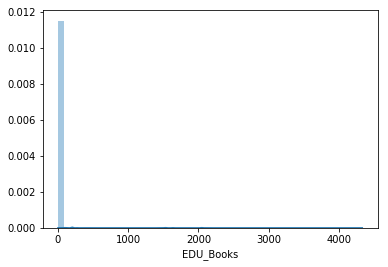

In [205]:
sns.distplot(merge['EDU_Books'])

In [180]:
merge.to_csv(r'merge1.csv')

In [185]:
data = merge

In [191]:
data.groupby(['STATUS_Have_Child']).size()

STATUS_Have_Child
0.0       583241
1.0         5967
2.0         4299
3.0         9270
4.0         2341
5.0          606
6.0         3386
7.0           45
8.0          919
9.0         1690
10.0          33
11.0          27
12.0         341
13.0          97
14.0         124
15.0         458
16.0           4
17.0        4023
18.0         320
20.0          81
21.0         132
22.0         127
24.0         757
25.0         206
26.0          54
27.0          10
30.0          21
42.0         576
47.0          20
48.0           7
49.0           1
54.0           8
66.0          18
75.0           2
81.0           6
85.0          48
86.0          60
90.0          16
109.0         10
125.0         64
152.0         22
184.0        528
225.0         30
234.0         39
404.0          7
426.0        289
427.0         24
531.0        256
539.0        144
668.0          2
875.0          6
1292.0         6
dtype: int64

In [192]:
data['goodsName'].unique()

array(['书籍/杂志/报纸', '女士内衣/男士内衣/家居服', '家庭/个人清洁工具', '彩妆/香水/美妆工具', '女装/女士精品',
       '粮油米面/南北干货/调味品', '3C数码配件', '运动/瑜伽/健身/球迷用品', '保健食品/膳食营养补充食品',
       '住宅家具', '洗护清洁剂/卫生巾/纸/香薰', 'OTC药品/医疗器械/计生用品', '男装', '居家日用',
       '尿片/洗护/喂哺/推车床', '童装/婴儿装/亲子装', '零食/坚果/特产', '其他', '美容护肤/美体/精油',
       '家装主材', '家居饰品', '电脑硬件/显示器/电脑周边', '餐饮具', '运动服/休闲服装', '运动鞋new',
       '流行男鞋', '汽车/用品/配件/改装', '户外/登山/野营/旅行用品', '饰品/流行首饰/时尚饰品新', '收纳整理',
       'ZIPPO/瑞士军刀/眼镜', '鲜花速递/花卉仿真/绿植园艺', '电子词典/电纸书/文化用品', '影音电器', '厨房电器',
       '居家布艺', '宠物/宠物食品及用品', '个人护理/保健/按摩器材', '节庆用品/礼品', '服饰配件/皮带/帽子/围巾',
       '厨房/烹饪用具', '五金/工具', '咖啡/麦片/冲饮', '女鞋', '手表', '茶', '童鞋/婴儿鞋/亲子鞋',
       '孕妇装/孕产妇用品/营养', '隐形眼镜/护理液', '酒类', '水产肉类/新鲜蔬果/熟食',
       '模玩/动漫/周边/cos/桌游', '办公设备/耗材/相关服务', '生活电器', '床上用品', '箱包皮具/热销女包/男包',
       '奶粉/辅食/营养品/零食', '基础建材', '电子/电工', '手机', '处方药', '玩具/童车/益智/积木/模型',
       '网络设备/网络相关', '自行车/骑行装备/零配件', '珠宝/钻石/翡翠/黄金', '大家电', '音乐/影视/明星/音像',
       '传统滋补营养品', '闪存卡/U盘/存储/移动硬盘', '乐器/吉他/钢琴/配件', '商业/办公家具', '平板电脑/MID',
       '手机号码/套餐